# Exploratory feature engineering

In [2]:
%pip install PyWavelets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from src.data.data_fetcher import get_raw_data
from src.features.preprocess_data import fetch_preprocessed_data, get_preprocessed_test_data

from src.visualization.plotting import plot_correlation_matrix



Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\gunna\Documents\Maskinlæring\Prosjekt\power-predictor\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [3]:

train_a, train_b, train_c, X_train_estimated_a, X_train_estimated_b, X_train_estimated_c, X_train_observed_a, X_train_observed_b, X_train_observed_c, X_test_estimated_a, X_test_estimated_b, X_test_estimated_c = get_raw_data()



X_train_obs_combined, X_val_obs_combined, y_train_obs_combined, y_val_obs_combined, X_train_est_combined, X_val_est_combined, y_train_est_combined, y_val_est_combined = fetch_preprocessed_data()



x_whole = pd.concat([X_train_obs_combined, X_val_obs_combined])
y_whole = pd.concat([y_train_obs_combined, y_val_obs_combined])
estimated_data = pd.concat([X_train_est_combined, X_val_est_combined, y_train_est_combined, y_val_est_combined])
# x_whole.reset_index(drop=True, inplace=True)
# y_whole.reset_index(drop=True, inplace=True)
pd.set_option('display.max_columns', None)


x_whole["time_since_prediction"].describe()

count    77044.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: time_since_prediction, dtype: float64

In [4]:
X_train_est_combined["time_since_prediction"].describe()

count    8665.000000
mean       27.754201
std         6.954756
min        15.951111
25%        21.991389
50%        27.991944
75%        33.993611
max        39.999167
Name: time_since_prediction, dtype: float64

In [5]:
gunnar = x_whole.copy()
gunnar["pv_measurement"] = y_whole.copy()
gunnar.head()

gunnar = gunnar.sort_index()

In [6]:
count = gunnar[(gunnar['pv_measurement'] > 0) & (gunnar['modified_solar_elevation'] < -0.15)].shape[0]
print(count)

0


In [7]:
pd.set_option('display.max_rows', 500)

subset = gunnar.iloc[47000:47000+500]
# subset.head(500)

In [8]:
import matplotlib.pylab as plt
def plot_pv_measurement(show: bool = False) -> None:
    segment_size = 5000
    num_segments = len(gunnar) // segment_size + (len(gunnar) % segment_size > 0)  # Calculate the number of segments

    for i in range(num_segments):
        # Select the segment
        start_idx = i * segment_size
        end_idx = start_idx + segment_size
        segment = gunnar.iloc[start_idx:end_idx]

        # Determine colors: 'blue' if the value is divisible by 9.8, else 'red'
        colors = ['blue' if val % 9.8 == 0 else 'red' for val in segment]

        # Create a new figure for each segment
        plt.figure(figsize=(20, 10))

        # Create a scatter plot with the colors we've specified
        plt.scatter(segment.index, segment, color=colors, s=50)  # s is the marker size

        # Since the line plot doesn't support multiple colors in the simple case, 
        # we won't draw lines between points. If you want lines, you'll need to 
        # plot lines separately between points of the same color.

        plt.title(f'location A Segment: {i+1}')
        plt.ylabel('PV Measurement')
        plt.xlabel('Date')

        if show:
            plt.show()
        # Consider saving each figure with a unique name, for example:
        # plt.savefig(f'results/figures/EFE/new_pv_measurement_segment_{i+1}.png')
        
        plt.close()





In [9]:
y_whole.sort_index(inplace=True)
y_whole.shape

(77044,)

In [10]:
top_50 = y_whole.value_counts().head(50)

# Print the results
print(top_50)

pv_measurement
0.0000      40710
9.8000        971
19.6000       577
29.4000       466
39.2000       390
49.0000       341
0.8625        317
58.8000       301
78.4000       265
68.6000       237
98.0000       233
88.2000       232
107.8000      212
117.6000      205
1.7250        202
2.5875        191
137.2000      183
127.4000      180
215.6000      145
156.8000      144
147.0000      138
3.4500        136
176.4000      135
186.2000      133
166.6000      126
254.8000      121
4.3125        120
205.8000      117
0.2200        116
196.0000      112
225.4000      112
245.0000      109
7.7625        107
6.9000        106
5.1750        105
235.2000      104
6.0375         93
323.4000       92
284.2000       91
294.0000       90
274.4000       86
264.6000       86
8.6250         80
303.8000       78
372.4000       77
12.0750        73
10.3500        72
9.4875         72
352.8000       72
0.4400         71
Name: count, dtype: int64


In [11]:
# plot_pv_measurement(True)

In [12]:
train_a, train_b, train_c, X_train_estimated_a, X_train_estimated_b, X_train_estimated_c, X_train_observed_a, X_train_observed_b, X_train_observed_c, X_test_estimated_a, X_test_estimated_b, X_test_estimated_c = get_raw_data()



In [13]:

def plot_pv_measurement_by_dataframe(dataframes: list, labels: list, show: bool = False) -> None:
    segment_size = 24*7*4
    
    # Loop through each dataframe and its label
    for df, label in zip(dataframes, labels):

        # Determine the number of segments for the current dataframe
        num_segments = len(df) // segment_size + (len(df) % segment_size > 0)

        # Loop through each segment
        for i in range(num_segments):
            # Select the segment of data
            start_idx = i * segment_size
            end_idx = start_idx + segment_size
            segment = df.iloc[start_idx:end_idx]

            # Create a new figure for each segment
            plt.figure(figsize=(20, 10))

            # Plot a standard line graph
            plt.plot(segment.index, segment['pv_measurement'], color='red', linewidth=2)

            # Add black dots for each data point using scatter
            plt.scatter(segment.index, segment['pv_measurement'], color='black', s=30)

            plt.title(f'{label} Segment: {i+1}')
            plt.ylabel('PV Measurement')
            plt.xlabel('Date')

            if show:
                plt.show()

            # Consider saving each figure with a unique name
            # plt.savefig(f'results/figures/{label}/new_pv_measurement_segment_{i+1}.png')

            plt.close()

# Example Usage
dataframes = [train_a, train_b, train_c]
labels = ['location_a', 'location_b', 'location_c']
# plot_pv_measurement_by_dataframe(dataframes, labels, show=True)

In [14]:
def plot_pv_measurement_by_location(data: pd.DataFrame, show: bool = False) -> None:
    segment_size = 24*7*4
    locations = ['location_a', 'location_b', 'location_c']  # column names for locations
    
    # Loop through each location
    for location in locations:
        # Filter data for the current location
        location_data = data[data[location] == 1]

        # Determine the number of segments for the current location
        num_segments = len(location_data) // segment_size + (len(location_data) % segment_size > 0)

        # Loop through each segment
        for i in range(num_segments):
            # Select the segment of data
            start_idx = i * segment_size
            end_idx = start_idx + segment_size
            segment = location_data.iloc[start_idx:end_idx]

            # Create a new figure for each segment
            plt.figure(figsize=(20, 10))

            # Plot a standard line graph
            plt.plot(segment.index, segment['pv_measurement'], color='red', linewidth=2)

             # Add black dots for each data point using scatter
            plt.scatter(segment.index, segment['pv_measurement'], color='black', s=30)


            plt.title(f'{location} Segment: {i+1}')
            plt.ylabel('PV Measurement')
            plt.xlabel('Date')

            if show:
                plt.show()

            # Consider saving each figure with a unique name, for example:
            # plt.savefig(f'results/figures/{location}/new_pv_measurement_segment_{i+1}.png')

            plt.close()

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_removed_points_with_original(train_a: pd.DataFrame, train_b: pd.DataFrame, train_c: pd.DataFrame, cleaned_data: pd.DataFrame, show: bool = False) -> None:
    segment_size = 24*7*4
    location_dataframes = {
        'location_a': train_a,
        'location_b': train_b,
        'location_c': train_c
    }
    
    total_removed_points = 0  # To count the total number of removed points

    # Loop through each location
    for location, original_df in location_dataframes.items():
        # Filter the cleaned data for the current location
        cleaned_location_data = cleaned_data[cleaned_data[location] == 1]
        
        # Determine the set difference: this will give us the points that were removed
        removed_points = original_df.drop(cleaned_location_data.index, errors='ignore')
        
        # Update the total count
        total_removed_points += len(removed_points)

        # Determine the number of segments for the removed points
        num_segments = len(removed_points) // segment_size + (len(removed_points) % segment_size > 0)

        # Loop through each segment
        for i in range(num_segments):
            # Select the segment of data
            start_idx = i * segment_size
            end_idx = start_idx + segment_size
            segment_removed = removed_points.iloc[start_idx:end_idx]
            segment_original = original_df.iloc[start_idx:end_idx]  # original data for this segment
            segment_kept = cleaned_location_data.iloc[start_idx:end_idx]  # kept data for this segment

            # Create a new figure for each segment
            plt.figure(figsize=(20, 10))

            # Add black dots for each removed data point using scatter
            plt.scatter(segment_removed.index, segment_removed['pv_measurement'], color='black', s=30)

            plt.title(f'Removed Points from {location} Segment: {i+1}')
            plt.ylabel('PV Measurement')
            plt.xlabel('Date')

            if show:
                plt.show()

            # Consider saving each figure with a unique name
            # plt.savefig(f'results/figures/{location}/removed_pv_measurement_segment_{i+1}.png')

            plt.close()

    # Print the total count of removed points
    print(f"Total removed data points: {total_removed_points}")

# Example Usage
# plot_removed_points_with_original(train_a, train_b, train_c, gunnar, show=True)


In [16]:
# plot_pv_measurement_by_location(gunnar, True)

## Removing of features with low variance

In [17]:
# Find name of all the columns that have a correlation of 0.9 or higher with pv_measurement
data_with_target = pd.concat([x_whole, y_whole], axis=1)

# Apply the mask to get the desired rows


# Drop these rows
# data_with_target = data_with_target.drop(data_with_target[(data_with_target['location_b'] == 1) | (data_with_target['location_c'] == 1)].index)
corr_matrix = data_with_target.corr()
corr_matrix["pv_measurement"].sort_values(ascending=False)


pv_measurement                    1.000000
sun_addition                      0.681308
direct_rad:W                      0.643780
sun_product                       0.634623
direct_rad_1h:J                   0.634285
clear_sky_rad:W                   0.627675
modified_solar_elevation          0.623007
clear_sky_energy_1h:J             0.618762
diffuse_rad:W                     0.554662
diffuse_rad_1h:J                  0.549343
effective_radiation               0.440267
is_day:idx                        0.418746
location_a                        0.348965
t_1000hPa:K                       0.294567
dew_point_2m:K                    0.225753
absolute_humidity_2m:gm3          0.220853
visibility:m                      0.163943
pressure_50m:hPa                  0.152089
sin_hour                          0.131900
cloud_base_agl:m                  0.105385
sin_day_of_year                   0.036073
wind_speed_w_1000hPa:ms           0.000879
sun_azimuth:d                    -0.010585
dew_or_rime

In [18]:
pd.set_option('display.max_rows', 60)

In [19]:
correlation_matrix = corr_matrix

# Create a mask to ignore self-correlation
mask = np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)

# Create a DataFrame from the mask array, keeping the column and index labels
masked_corr = pd.DataFrame(
    correlation_matrix.where(mask),
    columns=correlation_matrix.columns,
    index=correlation_matrix.index
)

# Reset index to move the DataFrame's indices to columns for melting
masked_corr = masked_corr.reset_index()

# "Melt" the DataFrame, converting it from wide format to long format
long_format = masked_corr.melt(id_vars='index', value_name='correlation')

# Drop NaN values which represent the duplicated and self-correlation values
long_format = long_format.dropna(subset=['correlation'])

# Sort the values by the absolute value of correlation, descending
sorted_correlation = long_format.reindex(
    long_format.correlation.abs().sort_values(ascending=False).index
)

# Now, 'sorted_correlation' is a DataFrame with 'index' as one feature, 'variable' as the second feature,
# and their correlation in 'correlation', sorted from most to least correlated

sorted_correlation.head(100)

,index,variable,correlation
1742,clear_sky_rad:W,modified_solar_elevation,0.994343
143,clear_sky_energy_1h:J,clear_sky_rad:W,0.992630
383,diffuse_rad:W,diffuse_rad_1h:J,0.988498
1741,clear_sky_energy_1h:J,modified_solar_elevation,0.987397
479,direct_rad:W,direct_rad_1h:J,0.987233
...,...,...,...
2170,diffuse_rad_1h:J,pv_measurement,0.549343
1553,clear_sky_energy_1h:J,cos_day_of_year,-0.542037
1554,clear_sky_rad:W,cos_day_of_year,-0.540676
1139,effective_cloud_cover:p,visibility:m,-0.531434


In [20]:
for i in range(min(100, len(sorted_correlation))):
    row = sorted_correlation.iloc[i]
    print(row)
    print() 

index                   clear_sky_rad:W
variable       modified_solar_elevation
correlation                    0.994343
Name: 1742, dtype: object

index          clear_sky_energy_1h:J
variable             clear_sky_rad:W
correlation                  0.99263
Name: 143, dtype: object

index             diffuse_rad:W
variable       diffuse_rad_1h:J
correlation            0.988498
Name: 383, dtype: object

index             clear_sky_energy_1h:J
variable       modified_solar_elevation
correlation                    0.987397
Name: 1741, dtype: object

index             direct_rad:W
variable       direct_rad_1h:J
correlation           0.987233
Name: 479, dtype: object

index          absolute_humidity_2m:gm3
variable                 dew_point_2m:K
correlation                    0.972862
Name: 282, dtype: object

index          direct_rad:W
variable       sun_addition
correlation        0.949292
Name: 1983, dtype: object

index                is_day:idx
variable       is_in_shadow:idx
correla

In [21]:
data_with_target.columns

Index(['absolute_humidity_2m:gm3', 'air_density_2m:kgm3',
       'clear_sky_energy_1h:J', 'clear_sky_rad:W', 'cloud_base_agl:m',
       'dew_or_rime:idx', 'dew_point_2m:K', 'diffuse_rad:W',
       'diffuse_rad_1h:J', 'direct_rad:W', 'direct_rad_1h:J',
       'effective_cloud_cover:p', 'is_day:idx', 'is_in_shadow:idx',
       'precip_5min:mm', 'precip_type_5min:idx', 'pressure_50m:hPa',
       'prob_rime:p', 'rain_water:kgm2', 'relative_humidity_1000hPa:p',
       'sun_azimuth:d', 'super_cooled_liquid_water:kgm2', 't_1000hPa:K',
       'total_cloud_cover:p', 'visibility:m', 'wind_speed_10m:ms',
       'wind_speed_u_10m:ms', 'wind_speed_v_10m:ms', 'wind_speed_w_1000hPa:ms',
       'location_a', 'location_b', 'location_c', 'sin_day_of_year',
       'cos_day_of_year', 'sin_hour', 'cos_hour', 'sun_product',
       'modified_solar_elevation', 'effective_radiation',
       'time_since_prediction', 'cloud_ratio', 'cloud_cover_over_30%',
       'sun_addition', 'is_freezing', 'is_snow', 'is_rain

c:\Users\gunna\Documents\Maskinlæring\Prosjekt\power-predictor\venv\lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


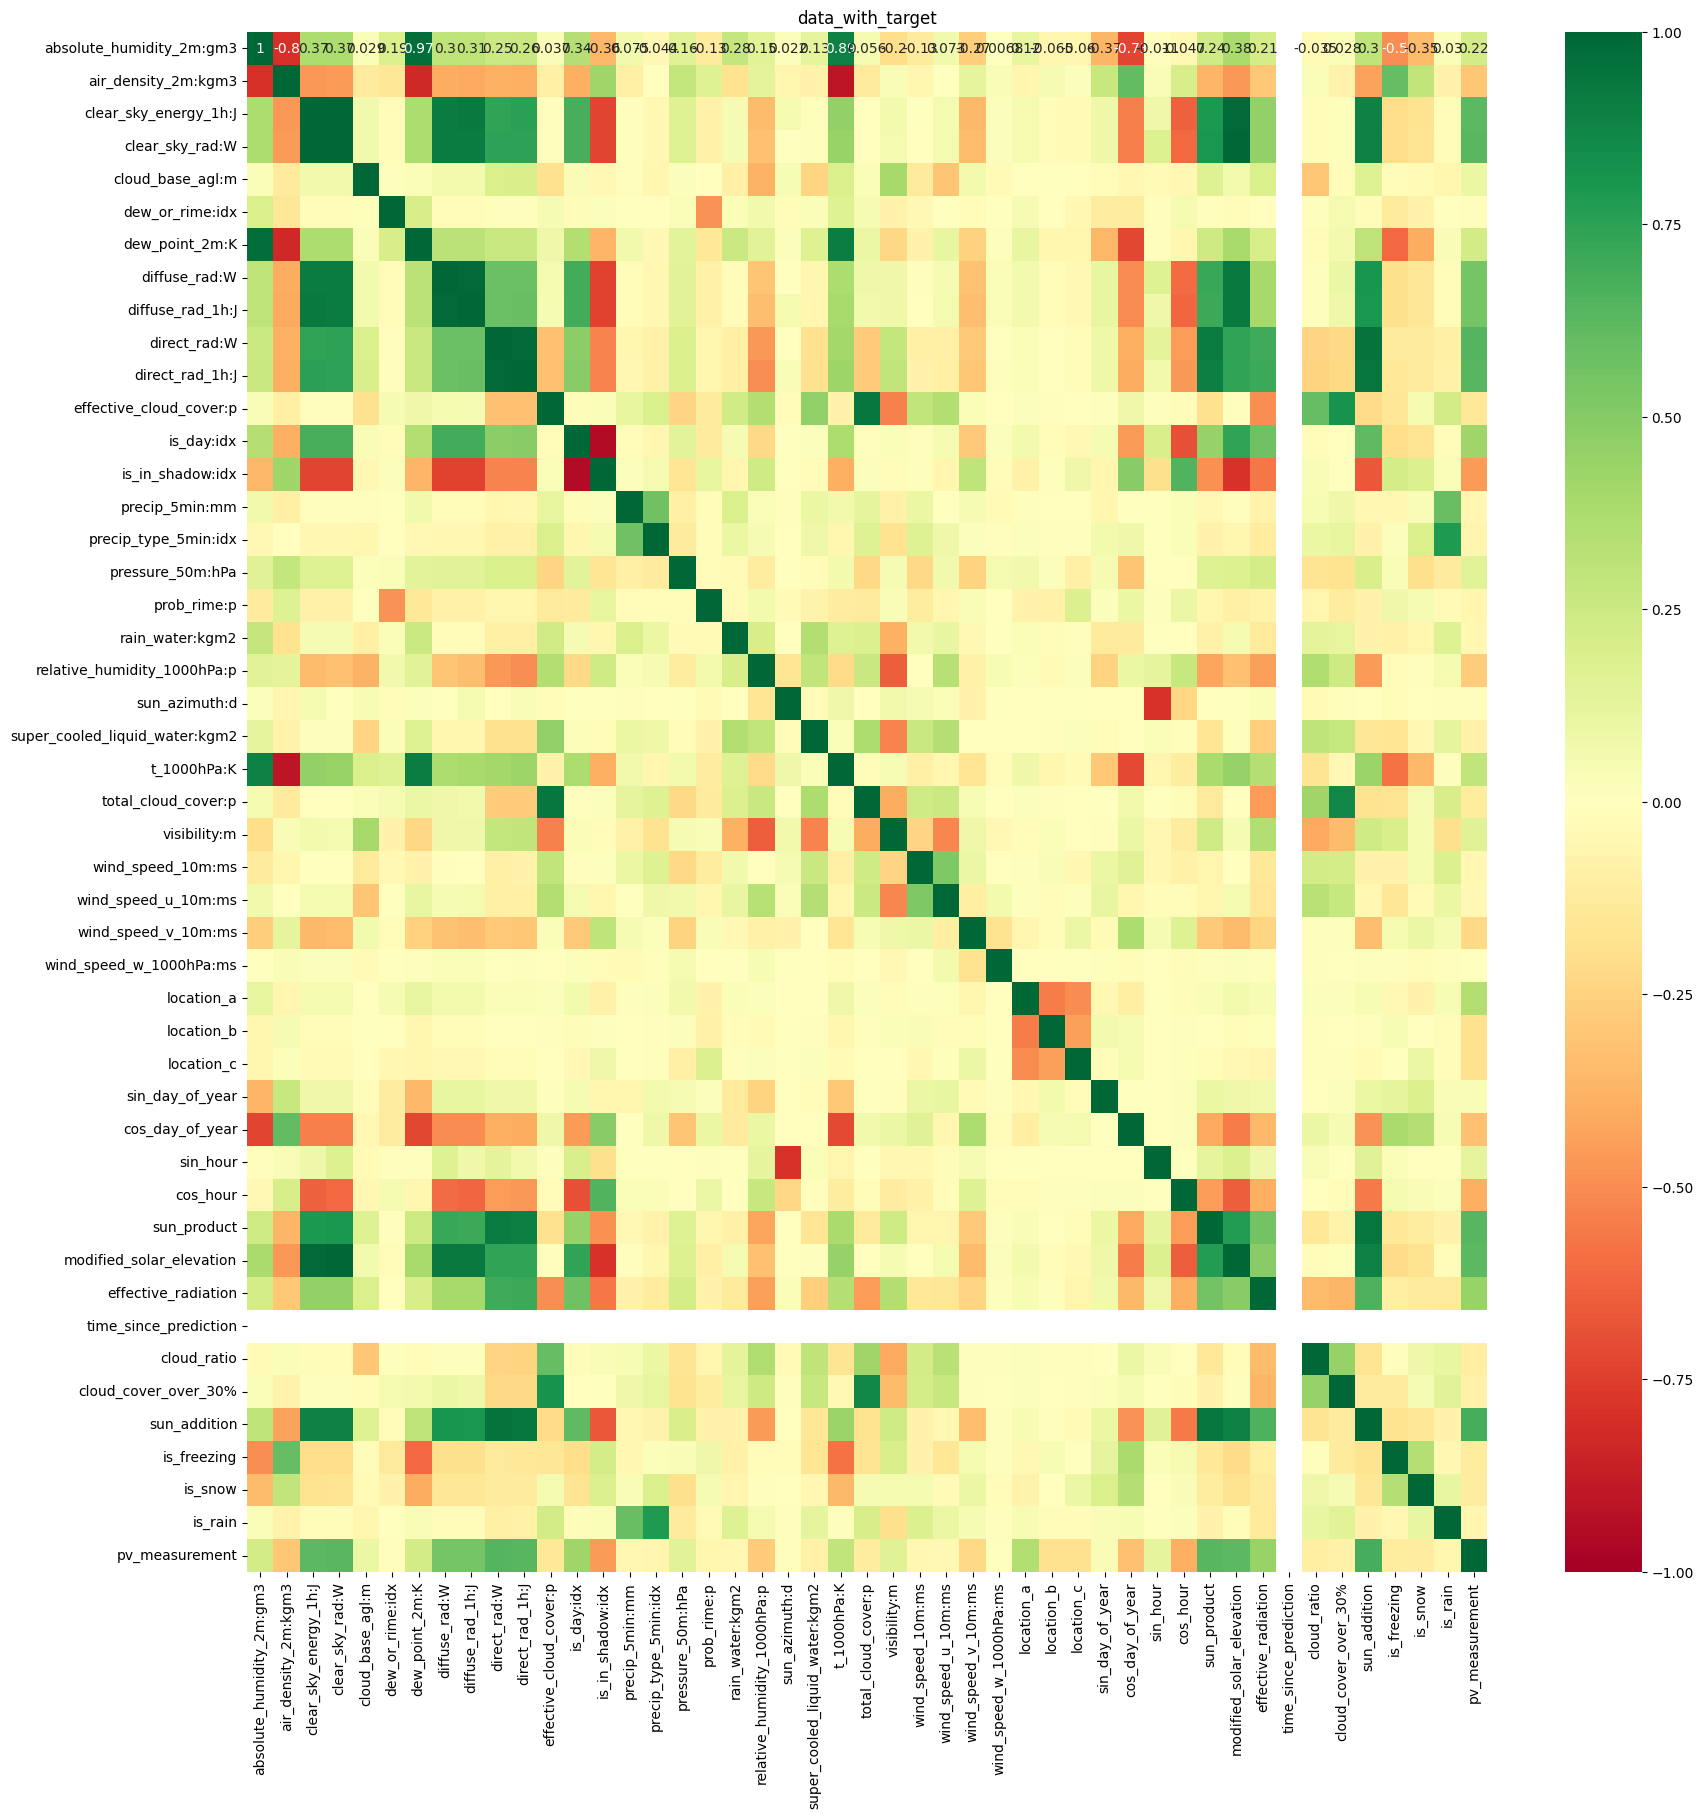

In [22]:

data_with_target = pd.concat([x_whole, y_whole], axis=1)



plot_correlation_matrix(data_with_target, "data_with_target", show=True)

In [23]:
# data_with_target = data_with_target[data_with_target['effective_cloud_cover:p'] < 50]
# data_with_target = data_with_target[data_with_target['precip_5min:mm'] == 0]

In [24]:
data_with_target.shape

(77044, 47)

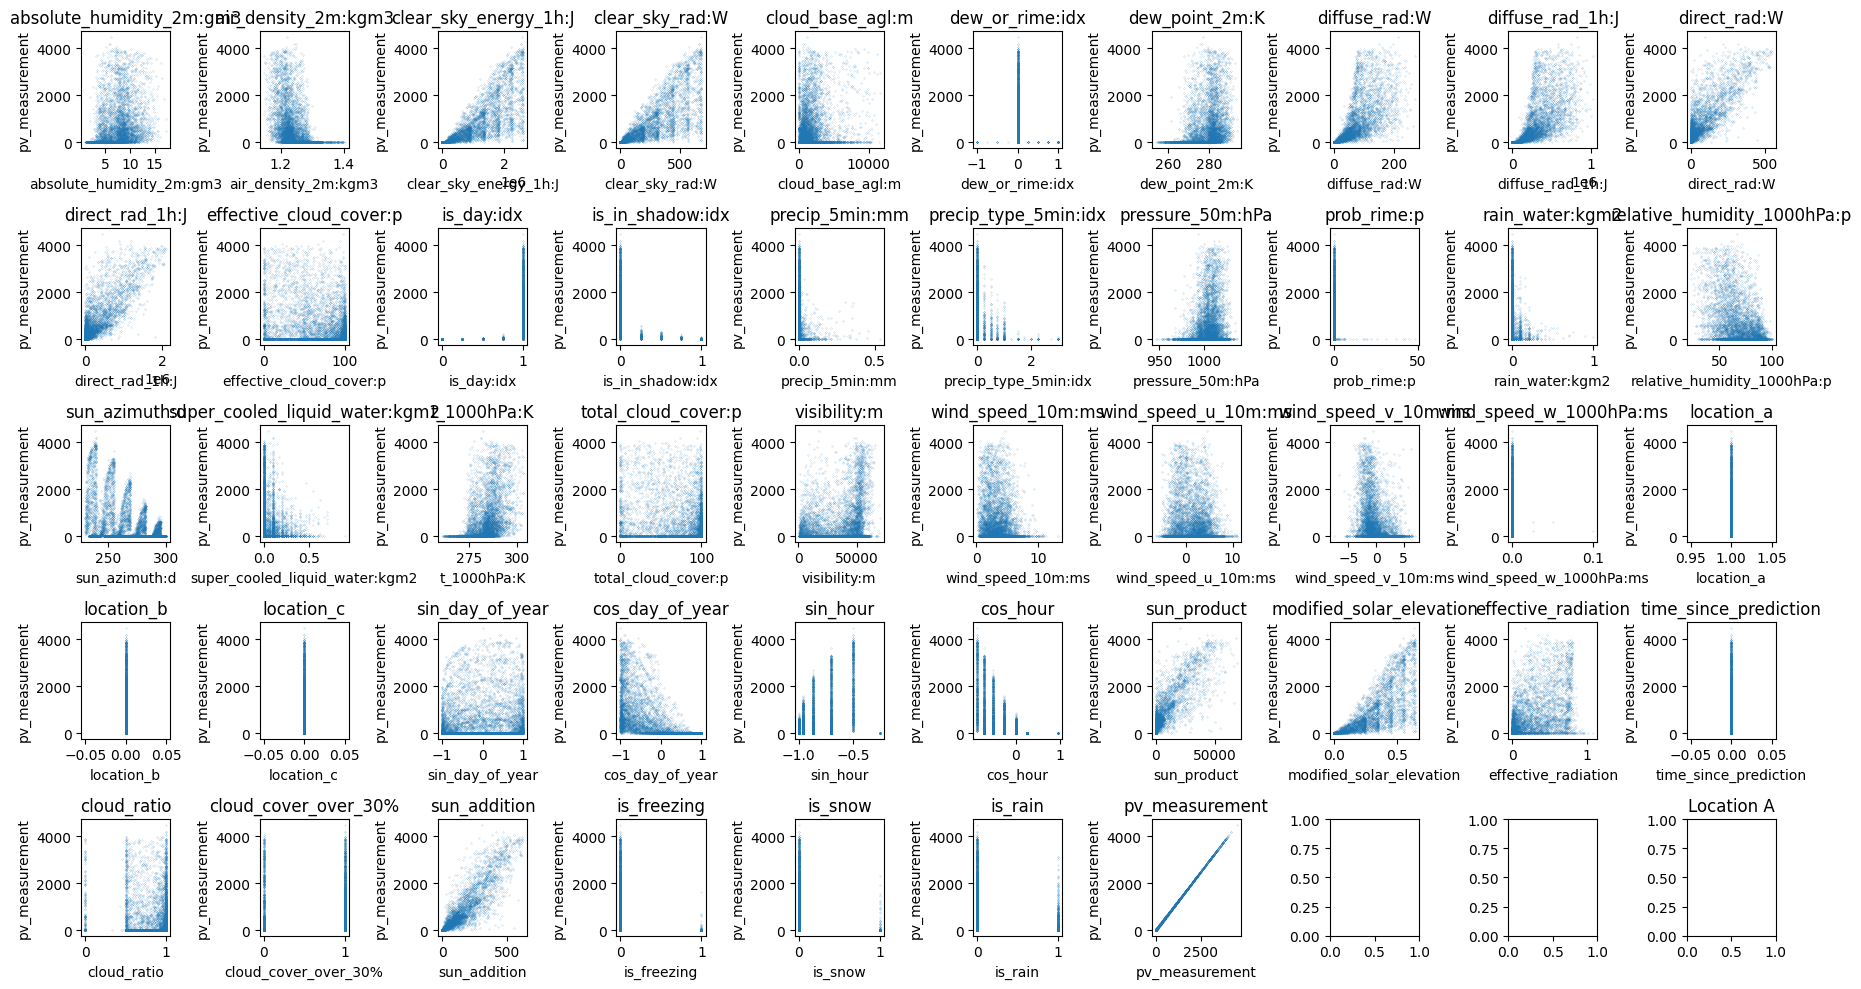

In [37]:


data_with_target_a = data_with_target[data_with_target['location_a'] == 1]
data_with_target_a = data_with_target_a[(data_with_target_a['sun_azimuth:d'] >= 230) & (data_with_target_a['sun_azimuth:d'] <= 300)]


fig, axs = plt.subplots(5, 10, figsize=(18, 10))  # Create a grid of 5x9 subplots

# Flatten the axis array and iterate over both the flattened array and the column names
# Assuming df is your DataFrame and you have stored all feature names in a list called feature_names
for ax, feature in zip(axs.flatten(), data_with_target_a.columns):
    ax.scatter(data_with_target_a[feature], data_with_target_a['pv_measurement'], s=0.01)  # Replace with your column names
    ax.set_title(feature)
    ax.set_xlabel(feature)
    ax.set_ylabel('pv_measurement')

# Adjust the layout so that plots do not overlap
plt.tight_layout()
plt.title("Location A")
plt.savefig("results/figures/feature_engineering/location_a_correlation_with_pv.png")
plt.show()

In [ ]:
from scipy.optimize import curve_fit
import pandas as pd

# 1. Filter out nighttime data (and/or very low solar elevations if needed)
filtered_df = data_with_target_a[data_with_target_a['pv_measurement'] > 0]

# Round the solar elevation values to whole numbers
filtered_df['rounded_elevation'] = filtered_df['sun_elevation:d'].round()

# Group by the rounded solar elevation and compute the maximum PV measurement for each group
max_df = filtered_df.groupby('rounded_elevation').agg({'pv_measurement': 'max'}).reset_index()

# 2. Define the model (same as before)
def model(theta, k, alpha):
    return k * np.cos(np.radians(90 - theta + alpha))

# 3. Fit the model to the max data
solar_elevation_max_values = max_df['rounded_elevation'].values
power_output_max_values = max_df['pv_measurement'].values

params_max, _ = curve_fit(model, solar_elevation_max_values, power_output_max_values, maxfev=100000, bounds=([0, -90], [np.inf, 90]))
k_estimated_max, alpha_estimated_max = params_max

# 4. Print the estimated values
print(f"Estimated k (using max PV values): {k_estimated_max}")
print(f"Estimated alpha (using max PV values): {alpha_estimated_max} degrees")


C:\Users\gunna\AppData\Local\Temp\ipykernel_2116\3806749719.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['rounded_elevation'] = filtered_df['sun_elevation:d'].round()


Estimated k (using max PV values): 7461.861182811256
Estimated alpha (using max PV values): -7.923252243129113 degrees


In [ ]:
from scipy.optimize import minimize

# Data preparation (filter out rows where PV measurement is zero or close to zero)
filtered_data = data_with_target_a[data_with_target_a['pv_measurement'] > 10]

# Extract relevant columns
sun_elevation = filtered_data['sun_elevation:d'].values
sun_azimuth = filtered_data['sun_azimuth:d'].values
pv_measurement = filtered_data['pv_measurement'].values

# Define the function to compute incidence angle
def compute_incidence_angle(sun_elevation, sun_azimuth, alpha, gamma):
    return np.cos(sun_elevation) * np.cos(alpha) + np.sin(sun_elevation) * np.sin(alpha) * np.cos(sun_azimuth - gamma)

# Define the cost function
def cost_function(params):
    alpha, gamma = params
    incidence_angle = compute_incidence_angle(sun_elevation, sun_azimuth, alpha, gamma)
    predicted_power = incidence_angle  # this is a simplification, in reality, the relationship might be nonlinear
    return np.mean((pv_measurement - predicted_power) ** 2)

# Optimize
initial_guess = [0, 0]  # initial guesses for alpha and gamma
result = minimize(cost_function, initial_guess, bounds=[(0, 90), (-180, 180)])

alpha_optimized, gamma_optimized = result.x
alpha_optimized, gamma_optimized

(8.149072527885437, 0.0)

In [ ]:
data_with_target_a["sun_azimuth:d"].describe()
sorted_df = data_with_target_a.sort_values(by='pv_measurement', ascending=False)
mean_azimuth = sorted_df.iloc[:1000]['sun_azimuth:d'].mean()
print(mean_azimuth)

169.64035


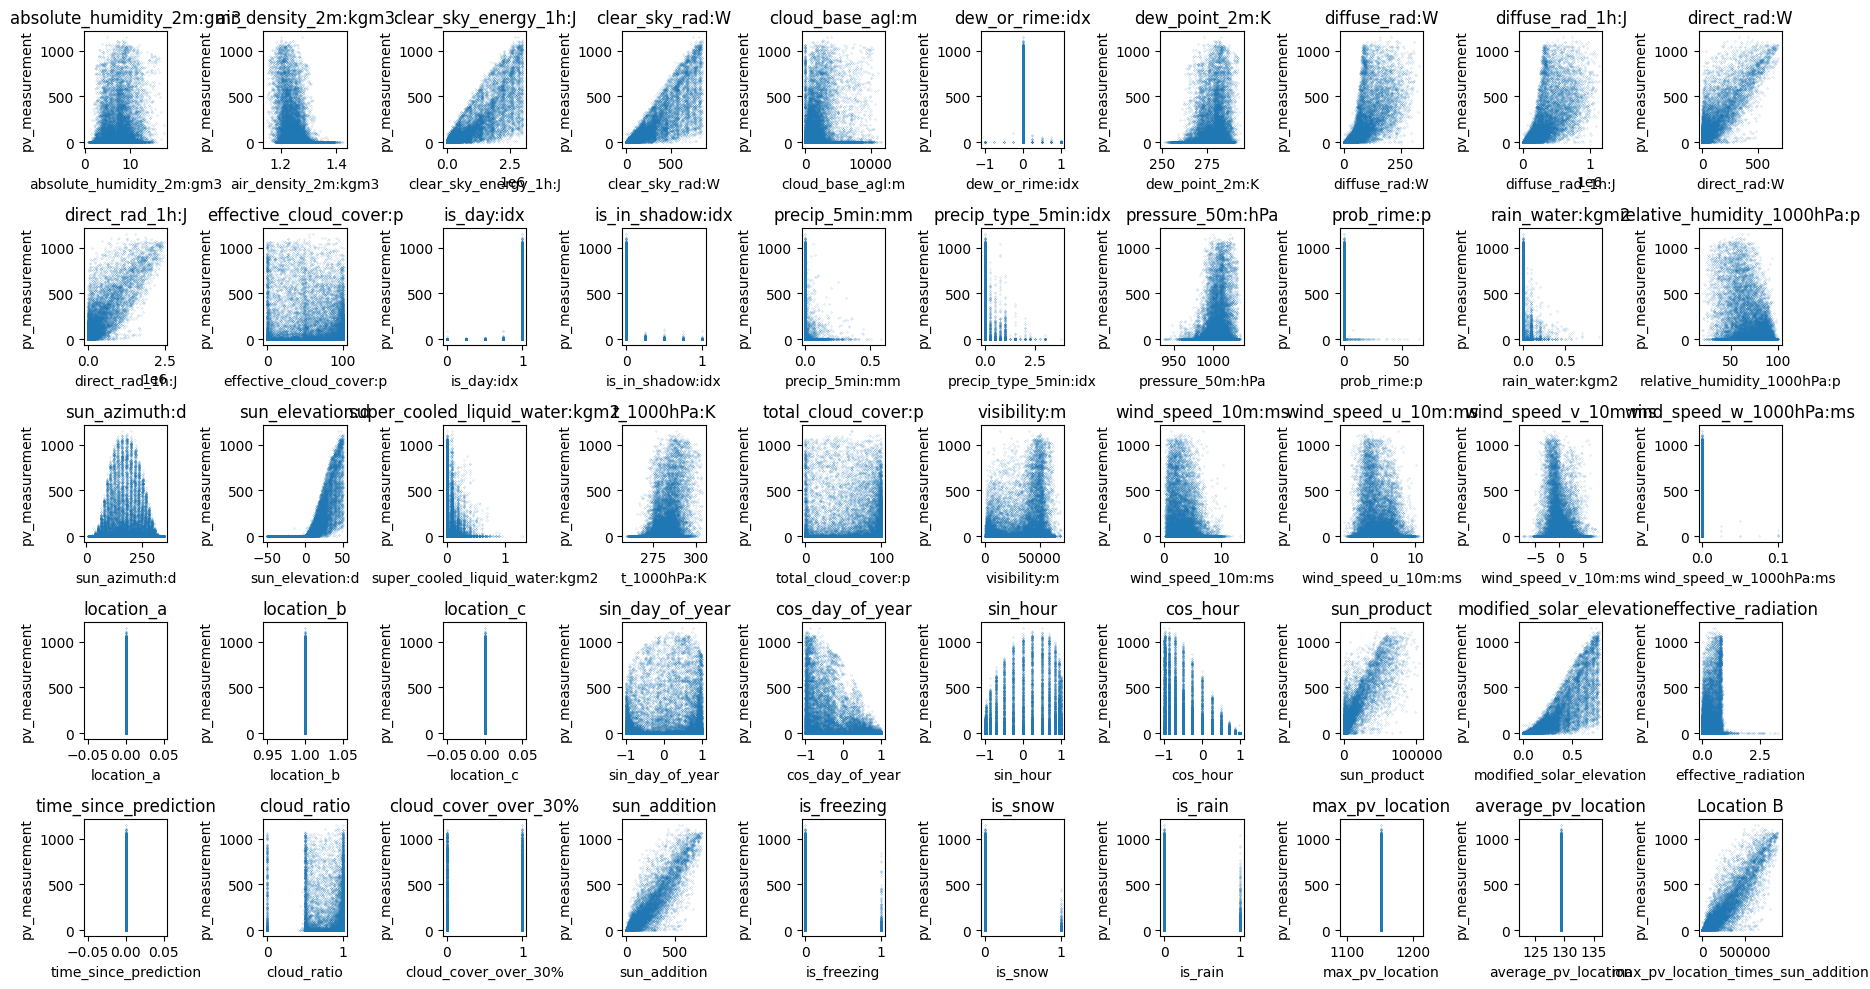

In [ ]:
data_with_target_b = data_with_target[data_with_target['location_b'] == 1]
fig, axs = plt.subplots(5, 10, figsize=(18, 10))  # Create a grid of 5x9 subplots

# Flatten the axis array and iterate over both the flattened array and the column names
# Assuming df is your DataFrame and you have stored all feature names in a list called feature_names
for ax, feature in zip(axs.flatten(), data_with_target_b.columns):
    ax.scatter(data_with_target_b[feature], data_with_target_b['pv_measurement'], s=0.01)  # Replace with your column names
    ax.set_title(feature)
    ax.set_xlabel(feature)
    ax.set_ylabel('pv_measurement')

# Adjust the layout so that plots do not overlap
plt.tight_layout()
plt.title("Location B")
plt.savefig("results/figures/feature_engineering/location_b_correlation_with_pv.png")
plt.show()

In [ ]:
from scipy.optimize import curve_fit
import pandas as pd

# 1. Filter out nighttime data (and/or very low solar elevations if needed)
filtered_df = data_with_target_b[data_with_target_b['pv_measurement'] > 0]

# Round the solar elevation values to whole numbers
filtered_df['rounded_elevation'] = filtered_df['sun_elevation:d'].round()

# Group by the rounded solar elevation and compute the maximum PV measurement for each group
max_df = filtered_df.groupby('rounded_elevation').agg({'pv_measurement': 'max'}).reset_index()

# 2. Define the model (same as before)
def model(theta, k, alpha):
    return k * np.cos(np.radians(90 - theta + alpha))

# 3. Fit the model to the max data
solar_elevation_max_values = max_df['rounded_elevation'].values
power_output_max_values = max_df['pv_measurement'].values

params_max, _ = curve_fit(model, solar_elevation_max_values, power_output_max_values, maxfev=10000, bounds=([0, -90], [np.inf, 90]))
k_estimated_max, alpha_estimated_max = params_max

# 4. Print the estimated values
print(f"Estimated k (using max PV values): {k_estimated_max}")
print(f"Estimated alpha (using max PV values): {alpha_estimated_max} degrees")


Estimated k (using max PV values): 1215.2852338428204
Estimated alpha (using max PV values): -6.8900554809791466 degrees


C:\Users\gunna\AppData\Local\Temp\ipykernel_2116\2675353282.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['rounded_elevation'] = filtered_df['sun_elevation:d'].round()


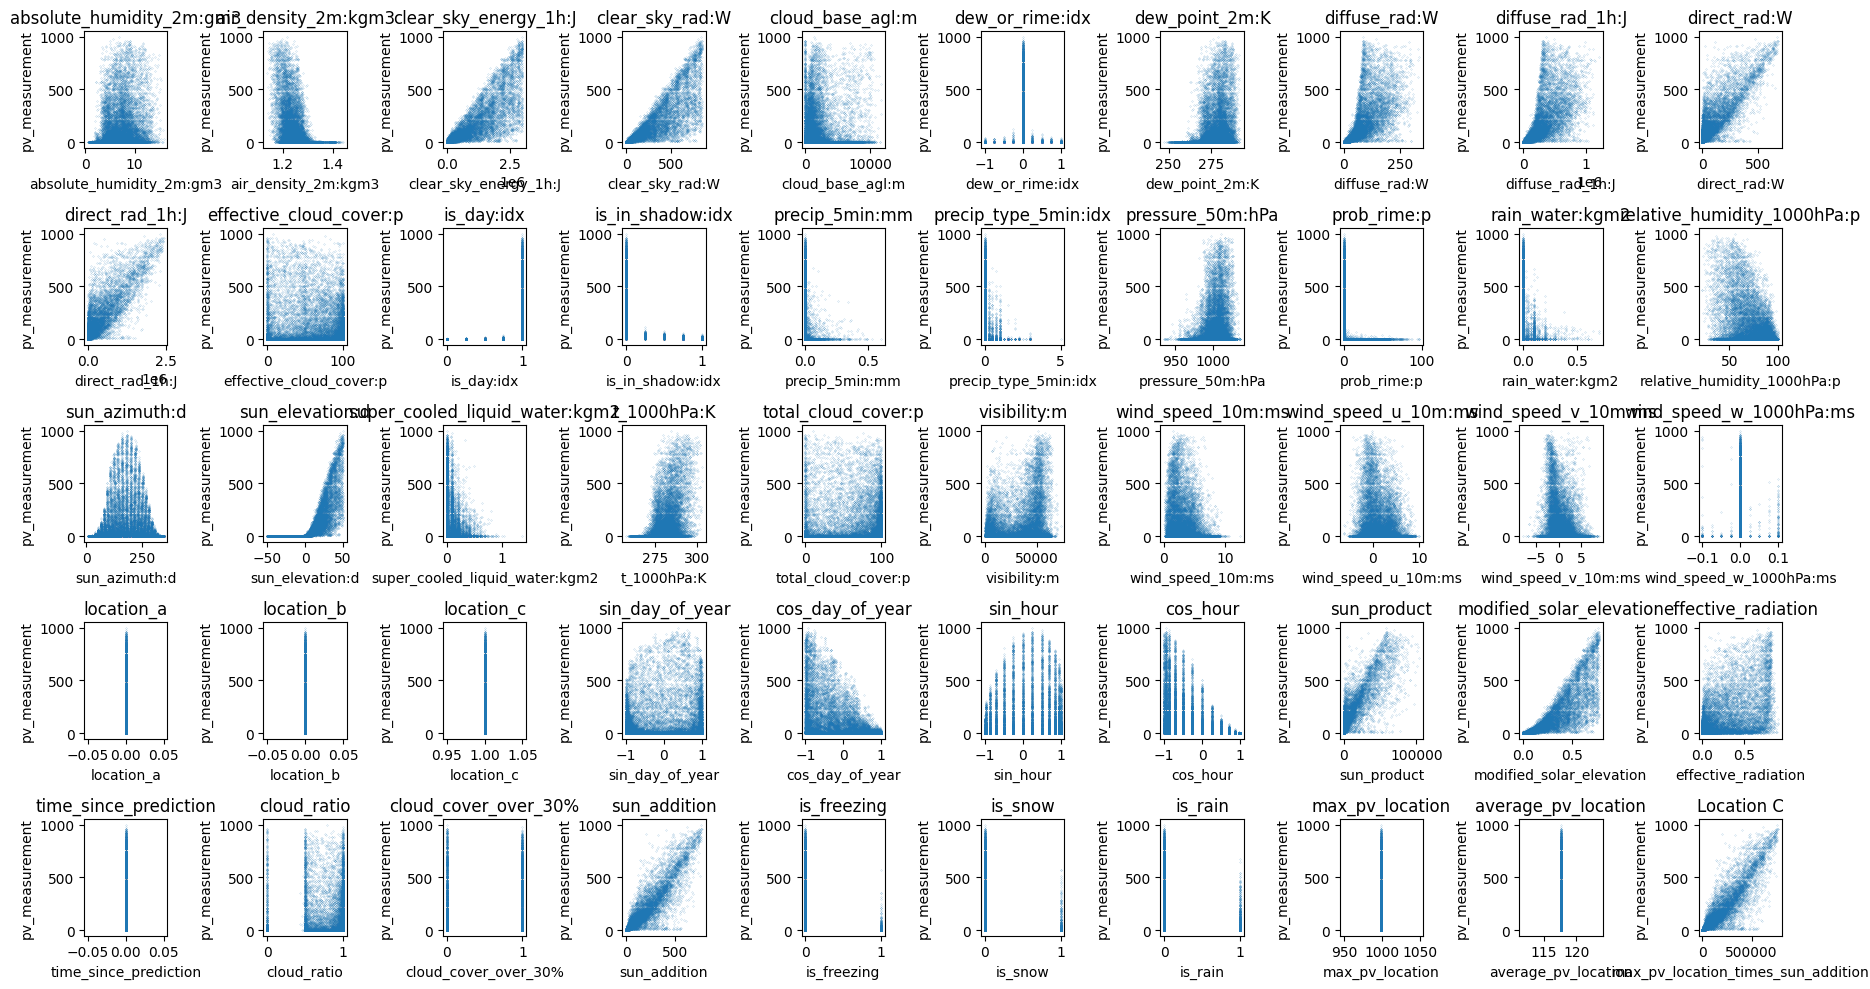

In [ ]:
data_with_target_c = data_with_target[data_with_target['location_c'] == 1]
fig, axs = plt.subplots(5, 10, figsize=(18, 10))  # Create a grid of 5x9 subplots

# Flatten the axis array and iterate over both the flattened array and the column names
# Assuming df is your DataFrame and you have stored all feature names in a list called feature_names
for ax, feature in zip(axs.flatten(), data_with_target_c.columns):
    ax.scatter(data_with_target_c[feature], data_with_target_c['pv_measurement'], s=0.01)  # Replace with your column names
    ax.set_title(feature)
    ax.set_xlabel(feature)
    ax.set_ylabel('pv_measurement')

# Adjust the layout so that plots do not overlap
plt.tight_layout()
plt.title("Location C")
plt.savefig("results/figures/feature_engineering/location_c_correlation_with_pv.png")
plt.show()

KeyError: 'pv_measurement'

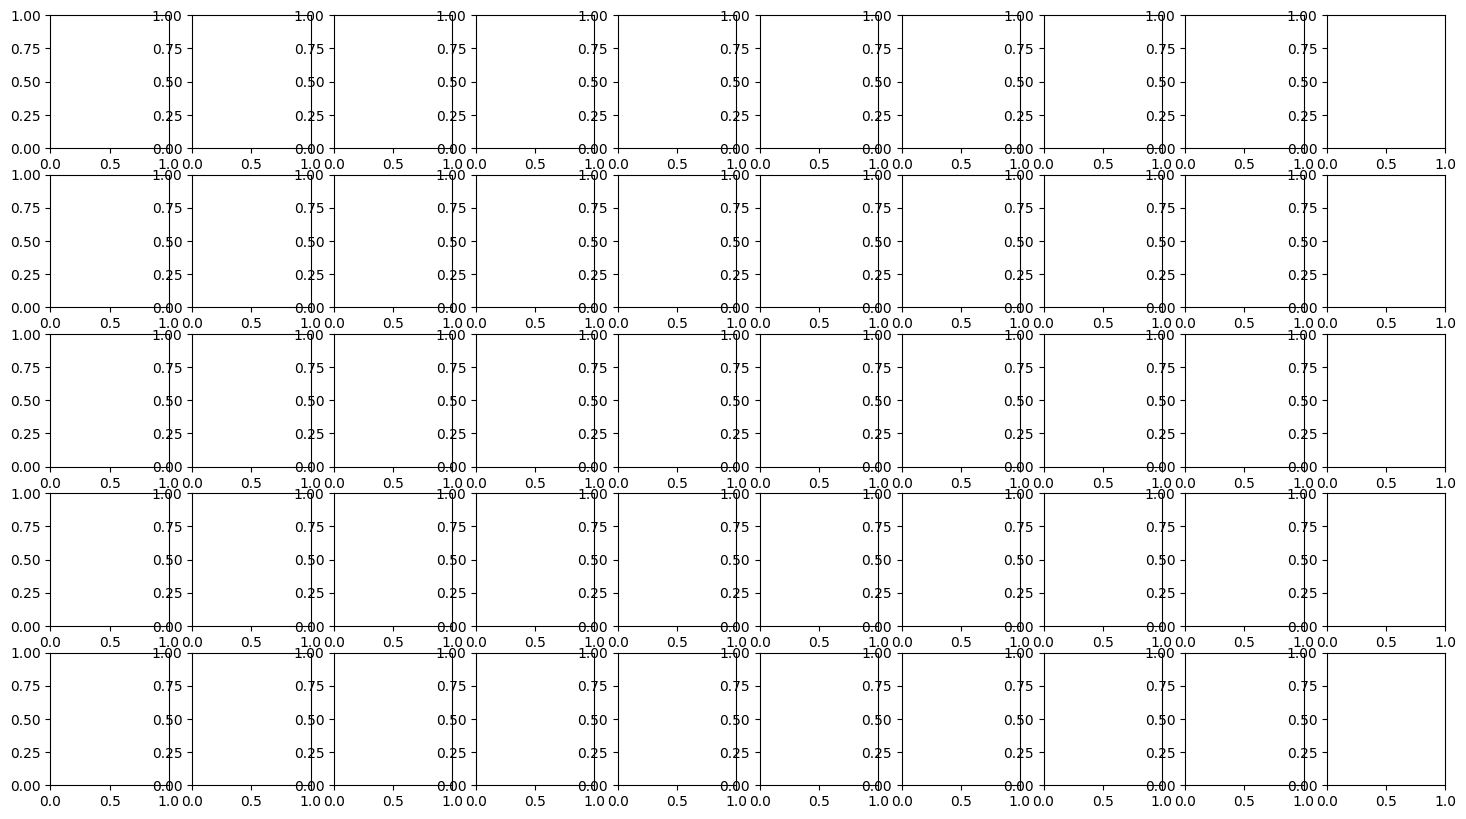

In [ ]:
data_with_target_a = estimated_data[estimated_data['location_a'] == 1]
fig, axs = plt.subplots(5, 10, figsize=(18, 10))  # Create a grid of 5x9 subplots

# Flatten the axis array and iterate over both the flattened array and the column names
# Assuming df is your DataFrame and you have stored all feature names in a list called feature_names
for ax, feature in zip(axs.flatten(), data_with_target_a.columns):
    ax.scatter(data_with_target_a[feature], data_with_target_a['pv_measurement'], s=0.01)  # Replace with your column names
    ax.set_title(feature)
    ax.set_ylabel('pv_measurement')

# Adjust the layout so that plots do not overlap
plt.tight_layout()
plt.title("Location A")
plt.savefig("results/figures/feature_engineering/location_a_correlation_with_pv.png")
plt.show()

In [ ]:
sorted_df = data_with_target_c.sort_values(by='pv_measurement', ascending=False)
mean_azimuth = sorted_df.iloc[:1000]['sun_azimuth:d'].mean()
print(mean_azimuth)

178.02687


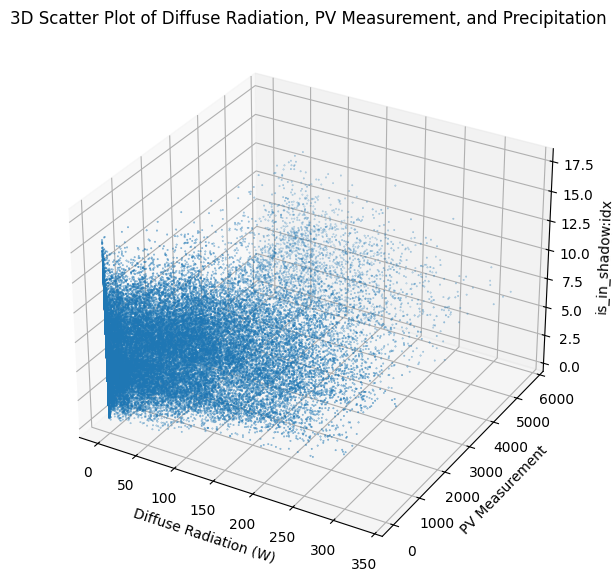

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data_with_target['diffuse_rad:W'], data_with_target['pv_measurement'], data_with_target['absolute_humidity_2m:gm3'], s=0.1)

ax.set_xlabel('Diffuse Radiation (W)')
ax.set_ylabel('PV Measurement')
ax.set_zlabel('is_in_shadow:idx')

plt.title('3D Scatter Plot of Diffuse Radiation, PV Measurement, and Precipitation')
plt.savefig("results/figures/feature_engineering/3d_scatter_plot.png")
plt.show()

In [ ]:
data_with_target.shape

(77049, 48)

In [ ]:
mask = (data_with_target_b["effective_radiation"] > 0.9)

# Apply the mask to get the desired rows
filtered_df = data_with_target_b[mask]


filtered_df.shape

(163, 48)

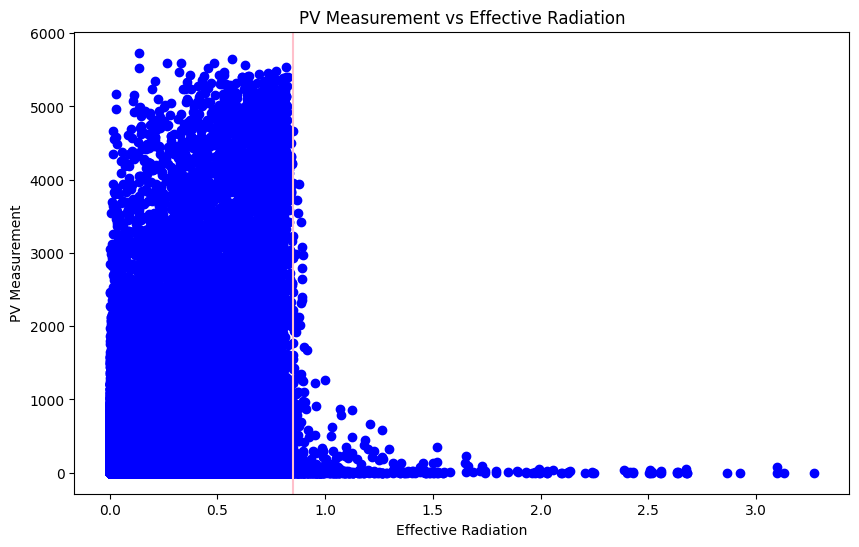

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and it has columns 'effective_radiation' and 'pv_measurement'

plt.figure(figsize=(10,6))  # You can adjust the size as needed

# Scatter plot
plt.scatter(data_with_target['effective_radiation'], data_with_target['pv_measurement'], color='blue')  # you can choose the color

# Adding a vertical line at x=0.9
plt.axvline(x=0.85, color='pink')  # Here, 'x' is the position of the vertical line on the x-axis

# Adding titles and labels
plt.title('PV Measurement vs Effective Radiation')
plt.xlabel('Effective Radiation')
plt.ylabel('PV Measurement')

# Show plot
plt.show()

In [ ]:

# pd.set_option('display.max_rows', 200)

mask = (data_with_target["modified_solar_elevation"] < -0.1) & (data_with_target['pv_measurement'] >0)

# Apply the mask to get the desired rows
filtered_df = data_with_target[mask]


filtered_df.head(10)


,absolute_humidity_2m:gm3,air_density_2m:kgm3,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,direct_rad_1h:J,effective_cloud_cover:p,is_day:idx,is_in_shadow:idx,precip_5min:mm,precip_type_5min:idx,pressure_50m:hPa,prob_rime:p,rain_water:kgm2,relative_humidity_1000hPa:p,sun_azimuth:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms,location_a,location_b,location_c,sin_day_of_year,cos_day_of_year,sin_hour,cos_hour,sun_product,modified_solar_elevation,effective_radiation,time_since_prediction,cloud_ratio,cloud_cover_over_30%,sun_addition,is_freezing,is_snow,is_rain,max_pv_location,pv_measurement


In [ ]:

mask = (data_with_target['sun_addition'] == 0) & (data_with_target['pv_measurement'] >0)

# Apply the mask to get the desired rows
filtered_df = data_with_target[mask]


filtered_df.shape


(354, 48)

In [ ]:
data_with_target

mask = (data_with_target['prob_rime:p'] > 10)

# Apply the mask to get the desired rows
filtered_df = data_with_target[mask]


filtered_df.head(200)

,absolute_humidity_2m:gm3,air_density_2m:kgm3,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,direct_rad_1h:J,effective_cloud_cover:p,is_day:idx,is_in_shadow:idx,precip_5min:mm,precip_type_5min:idx,pressure_50m:hPa,prob_rime:p,rain_water:kgm2,relative_humidity_1000hPa:p,sun_azimuth:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms,location_a,location_b,location_c,sin_day_of_year,cos_day_of_year,sin_hour,cos_hour,sun_product,modified_solar_elevation,effective_radiation,time_since_prediction,cloud_ratio,cloud_cover_over_30%,sun_addition,is_freezing,is_snow,is_rain,max_pv_location,pv_measurement
84117,4.175,1.28850,0.000000,0.000000,4710.725098,-1.00,271.250000,0.000000,0.000000,0.000000,0.000000,86.400002,0.0,1.0,0.0,0.0,1002.250000,14.425000,0.0,83.574997,75.529999,0.0,274.175018,99.849998,46399.375000,1.825,-1.175,1.350,0.0,0,0,1,-0.242687,0.970105,0.707107,7.071068e-01,0.000000,0.000000,0.000000,0,0.865298,1,0.0,0,0,0,117.600,0.0
91645,5.700,1.26000,0.000000,0.000000,7924.000000,1.00,275.500000,0.000000,0.000000,0.000000,0.000000,46.525002,0.0,1.0,0.0,0.0,993.900024,22.225000,0.0,82.925003,296.765991,0.0,281.075012,83.250000,40922.500000,2.250,0.350,2.225,0.0,0,0,1,-0.915546,0.402214,-0.965926,2.588190e-01,0.000000,0.000000,0.000000,0,0.558859,1,0.0,0,0,0,117.600,0.0
95014,3.400,1.29900,47882.425781,37.825001,0.000000,-0.75,268.475006,21.825001,39799.546875,21.674999,38986.949219,1.000000,1.0,0.5,0.0,0.0,1011.900024,21.674999,0.0,65.099998,102.880753,0.0,275.049988,1.975000,46470.199219,1.650,-0.475,1.550,0.0,0,0,1,0.955979,0.293434,1.000000,6.123234e-17,473.056885,0.075175,0.814223,0,0.506329,0,43.5,0,0,0,117.600,29.4
76356,3.600,1.27250,0.000000,0.000000,1029.349976,-0.25,269.399994,0.000000,0.000000,0.000000,0.000000,32.224998,0.0,1.0,0.0,0.0,982.575012,10.175000,0.0,79.000000,247.088257,0.0,274.799988,64.449997,44330.625000,1.850,-1.475,1.125,0.0,0,0,1,0.447945,0.894061,-0.866025,-5.000000e-01,0.000000,0.000000,0.000000,0,0.500000,1,0.0,0,0,0,117.600,0.0
92728,3.050,1.29650,0.000000,0.000000,2265.574951,-1.00,267.299988,0.000000,0.000000,0.000000,0.000000,100.000000,0.0,1.0,0.0,0.0,999.450012,58.299999,0.0,81.599998,23.435501,0.0,273.225006,100.000000,30968.500000,1.800,-1.675,0.600,0.0,0,0,1,-0.357464,0.933927,0.000000,1.000000e+00,0.000000,0.000000,0.000000,0,1.000000,1,0.0,0,0,0,117.600,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82941,5.825,1.23450,0.000000,0.000000,1979.649902,1.00,275.924988,0.000000,0.000000,0.000000,0.000000,74.050003,0.0,1.0,0.0,0.0,982.200012,19.225000,0.0,80.175003,73.432503,0.0,281.975006,86.000000,47022.875000,1.825,0.700,1.700,0.0,0,0,1,-0.885725,0.464210,0.707107,7.071068e-01,0.000000,0.000000,0.000000,0,0.861047,1,0.0,0,0,0,117.600,0.0
86441,5.000,1.26325,0.000000,0.000000,6024.024902,-1.00,273.649994,0.000000,0.000000,0.000000,0.000000,25.325001,0.0,1.0,0.0,0.0,990.275024,63.049999,0.0,83.199997,179.370255,0.0,279.825012,32.450001,32899.574219,1.550,0.500,1.450,0.0,0,0,1,0.984306,0.176471,-0.258819,9.659258e-01,0.000000,0.000000,0.000000,0,0.780431,0,0.0,0,0,0,117.600,0.0
95157,3.550,1.31850,3532.325195,6.000000,0.000000,-1.00,269.100006,4.500000,8084.250000,0.000000,0.000000,0.000000,0.5,1.0,0.0,0.0,1020.650024,61.175003,0.0,72.425003,88.719254,0.0,273.850006,0.000000,37315.375000,0.900,0.100,0.875,0.0,0,0,1,0.981125,0.193376,0.965926,2.588190e-01,0.000000,0.000000,0.000000,0,0.000000,0,4.5,0,0,0,117.600,9.8
35188,4.750,1.25975,0.000000,0.000000,1257.099976,-1.00,273.049988,0.000000,0.000000,0.000000,0.000000,14.650000,0.0,1.0,0.0,0.0,995.799988,28.100000,0.0,62.250000,338.865753,0.0,282.524994,29.100000,46605.976562,1.775,0.050,1.700,0.0,0,1,0,0

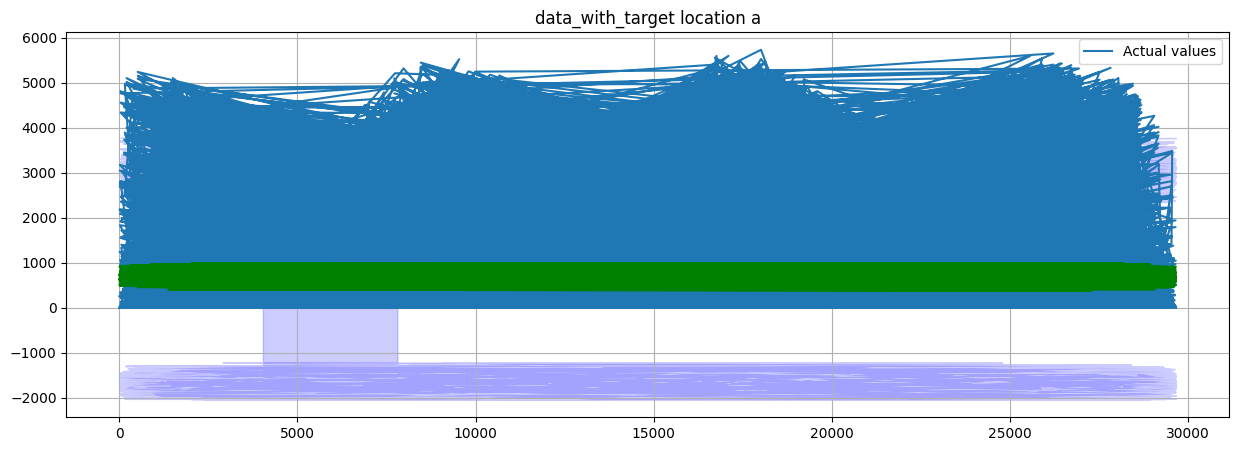

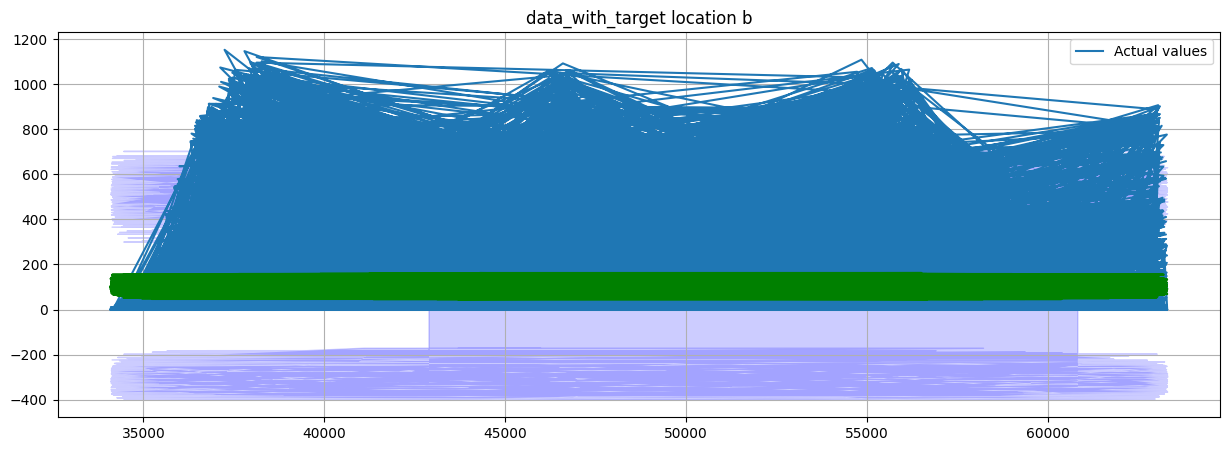

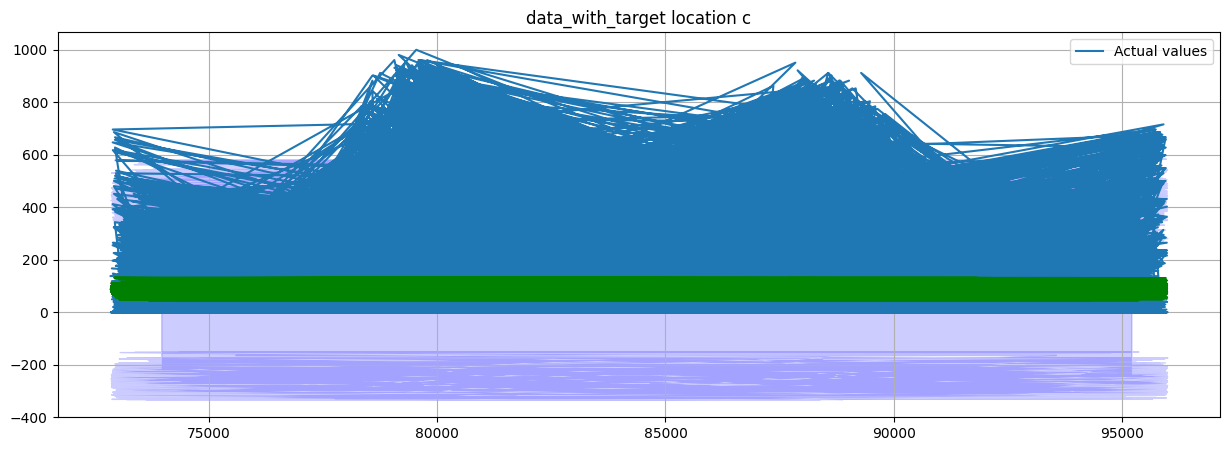

In [ ]:
from src.visualization.plotting import plot_moving_average
# Compute moving averages for trend analysis for Location A, B and C
plot_moving_average(data_with_target_a['pv_measurement'], window=24*7, plot_intervals=True, title="data_with_target location a")
plot_moving_average(data_with_target_b['pv_measurement'], window=24*7, plot_intervals=True, title="data_with_target location b")
plot_moving_average(data_with_target_c['pv_measurement'], window=24*7, plot_intervals=True, title="data_with_target location c")